# Classical SIR model applied to Covid-19 epidemic
## Entai Lin

### Project overview
- Context on SIR model
- Defining SIR model as a python function
- Model based on Wuhan initial parameters
- Plot model and compare results

key documentation:

odesolver: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html 

SIR paper: https://pmc.ncbi.nlm.nih.gov/articles/PMC7321055/

Covid numbers: https://www.worldometers.info/coronavirus/ 

## SIR model context
Going back home to New Zealand for this first time in what feels like eons sent me spiralling down a nostalgia trip. Revisiting my old favourite food joints, hangout spots and seeing childhood friends inspired me to consume my old favorite media: Avatar the last airbender, Australian reality TV and for the sake of this project Plague Inc! For those who are unfamiliar, Plague Inc is an interactive mobile game, based on the popular board game Pandemic, in which one constructs a disease and tries to infect the whole world. Little did 9 year old me know however, that Plague Inc in reality was quite an impressive SIR disease model in disguise. 

Like most other SIR models, the game split its similated population into three categories: **S for Susceptible, I for Infected, and R for Removed**. Individuals move from the susceptible population, able to get the disease, into the infected population, currently having the disease, to being removed, unable to get the disease again. On the easy mode of the game, and also in the early stages of most real world epidemics, there is an assumption of homogeniety, meaning that susceptible and infected indviduals mix randomly, and there is also an assumption of constant population.

Intuitively, one would expect the rate of increase in the number of infected to be proportional to the number of already infected individuals, and the number of susceptible individuals. After all, more infected people provide more vectors for the disease to spread, and more susceptible individuals provide more people for said disease to spread to. The rate in which people become removed is proportional to the amount of infected people in the population. This is because only infected people can become well again. 

The way scientists model this relationship is as follows: 
### $\frac{dS(t)}{dt}$ = $-aS(t)I(t)$
### $\frac{dI(t)}{dt}$ = $aS(t)I(t) - bI(t)$
### $\frac{dR(t)}{dt}$ = $bI(t)$

where S(t) is the function of susceptibles through time, I(t) is the function of infected through time, R(t) is the function of removed through time, and a is the constant of the rate of infection and b being the constant of rate of removal. Intuitively, a high "a" constant means that the disease is more infectious, factors that can affect this constant are: implementation of social distancing and good hygeine pracice. Some factors that can affect the "b" constant are: better treatment, such as antibiotics for bacterial diseases. We can also decrease the rate of increase of infected by removing susceptibles through vaccinations. In reality, this "a" constant is actually not fixed, since when a disease is spreading health organisations tend to enforce measures to slow it down. For covid, the "b" variable is relatively fixed since there is no such thing as a viral antibiotic, or any way to really decrease the average length of infection.

## Defining this system as a python function
Next, we will be defining this system of differential equations in the form of a python function

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Let us define $A(S,I,R)$ as the parametric equation dependant on time describing the number of susceptibles, infected and removed over time. If we define $\frac{dA}{dt}$ as a dimension 3 vector containing $[\frac{dS}{dt}, \frac{dI}{dt}, \frac{dR}{dt}]$, we can use scipy's "odeint" along with some initial conditions to solve for A.

In [6]:
def dAdt(A, t, a, b, N):
    S= A[0]
    I = A[1]
    R = A[2]
    return [
        -a/N * S * I,
        a/N * S * I - b * I,
        b*I
    ]

We will use China's initial values from 22nd of January, 2020 to fit our first model.

We can generalize this model to South Korea, India, Australia, USA, Italy etc. by adjusting the model parameters N,a,b, and initial values.

For this model, we used N taken from worldometer and figure 1 of the research paper referenced above.

In [23]:
times = np.arange(0, 100, 1)
N = 1448
a = 0.35
b = 0.035
S0, I0, R0 = N-N*4e-3, N*4e-3, 0
sol = odeint(dAdt, y0=[S0, I0, R0], t=times, args=(a, b, N))

We will reformat out results to make them easier to plot

In [25]:
S = sol.T[0]
I = sol.T[1]
R = sol.T[2]

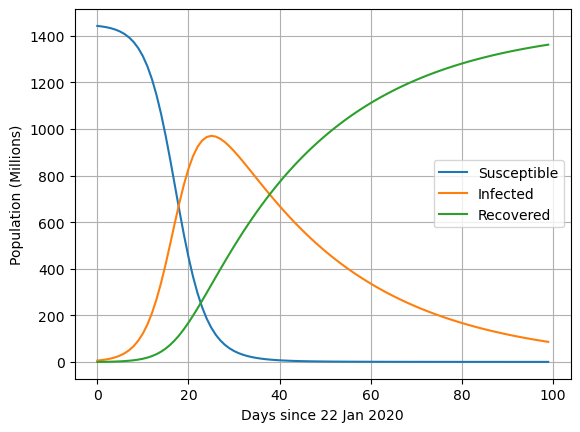

In [27]:
plt.plot(times, S)
plt.plot(times, I)
plt.plot(times, R)
plt.xlabel("Days since 22 Jan 2020")
plt.ylabel("Population (Millions)")
plt.legend(["Susceptible","Infected","Recovered"]) 
plt.grid()

In [53]:
peak_infections = I.max()
peak_infections_day = np.where(I == peak_infections)[0][0]
peak_infections_day, peak_infections

(25, 970.3396395224885)

## Interpretation
This model predicts that the turning point of infections (K<1), or when the rate of recovery becomes greater than the rate of infections, begins on day 25, with an infected peak of 970 million individuals in China alone. In reality, there were only 700 million total covid cases, so the model greatly overpredicted the number of covid infections. 

This may not be a fault in the model however, since in reality, there are changing factors that are assumed to be constant in the classical SIR model that are slowing the spread of infection. Things such as lockdown, wearing masks, social distancing, public health campaigns can all be said to reduce the rate of infection and the spread of COVID. Reality works very differently to a fixed model.

In real life, the covid pandemic lasted much longer than this model predicted. Instead, the covid epidemic was spread much slowly and had a much flatter infected curve. This is a good thing as reducing the amount of infected individuals reduces the number of deaths. Also, Covid is a disease with long lasting effects on an infected individual, and a chance of affecting the same person twice (which goes against our assumption that infected indivuduals can only go into the removed category), therefore in actuality, unbridled Covid-19 would create even more severe infection and death numbers. In summary, this model roughly predicts the spread of Covid given we did nothing about it. By comparing it with real world data, we can estimate the positive effect of disease control measures in decreasing the spread of disease.